## Importing the Libraries

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

## Importing the Data

In [3]:
data = pd.read_csv("Reliance.csv")

## Data Representation

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-22,472.950012,483.950012,472.524994,481.225006,465.706635,437740.0
1,2016-02-23,482.000000,483.450012,471.524994,475.350006,460.021088,3589456.0
2,2016-02-24,473.149994,479.500000,471.274994,476.274994,460.916260,2915298.0
3,2016-02-25,478.500000,478.500000,470.850006,472.200012,456.972656,665922.0
4,2016-02-26,475.000000,479.250000,472.475006,475.250000,459.924286,450218.0


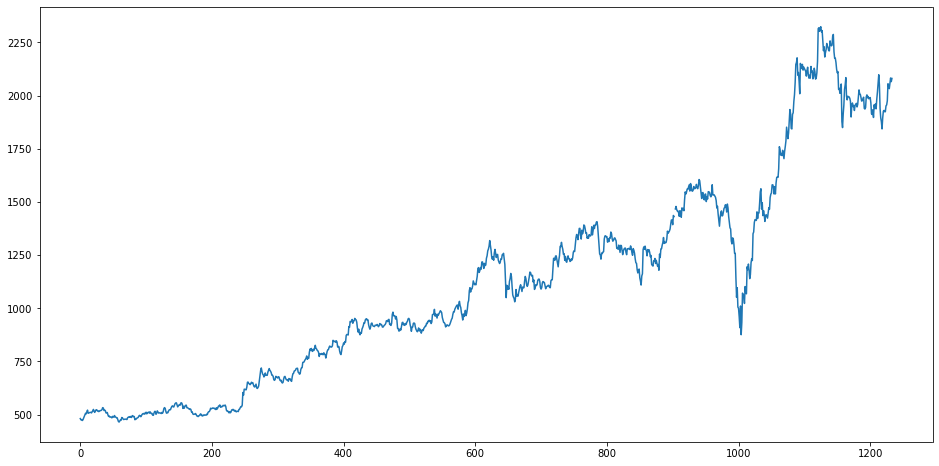

In [5]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')

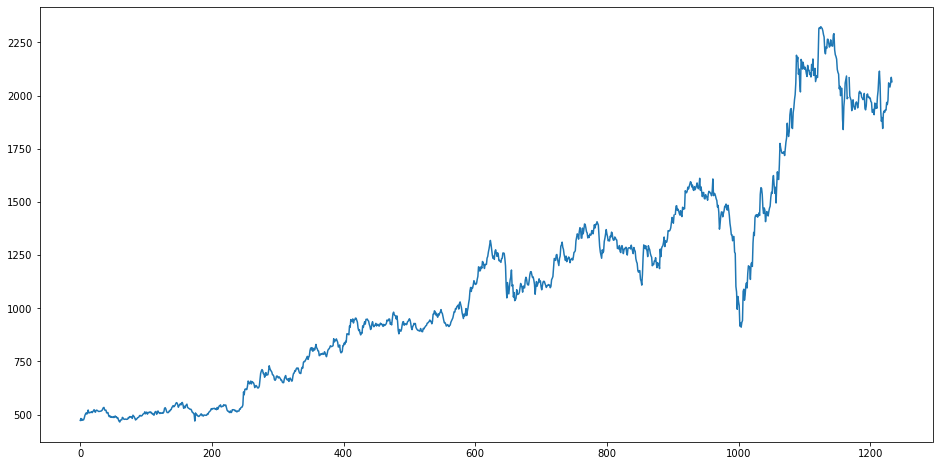

In [6]:
plt.figure(figsize=(16,8))
plt.plot(data['Open'])

## Model Training

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.model_selection import train_test_split

In [9]:

data.drop(['Date'],axis=1,inplace=True)
X=data.drop(['Close'],axis=1)
y=data['Close']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
data.loc[:, data.isnull().any()].columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
data.Open.fillna(data.Open.mean(),inplace=True)

In [12]:
data.High.fillna(data.High.mean(),inplace=True)
data.Low.fillna(data.Low.mean(),inplace=True)
data.Close.fillna(data.Close.mean(),inplace=True)
#data.Adj Close.fillna(data.Adj Close.mean(),inplace=True)
data.Volume.fillna(data.Volume.mean(),inplace=True)

In [13]:

data.drop(['Adj Close'],axis=1,inplace=True)
X=data.drop(['Close'],axis=1)
y=data['Close']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Model testing

In [14]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [15]:
y_pred = regressor.predict(X)

In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y , y_pred)
print(r2)

0.9998891957998567


## Result Plotting

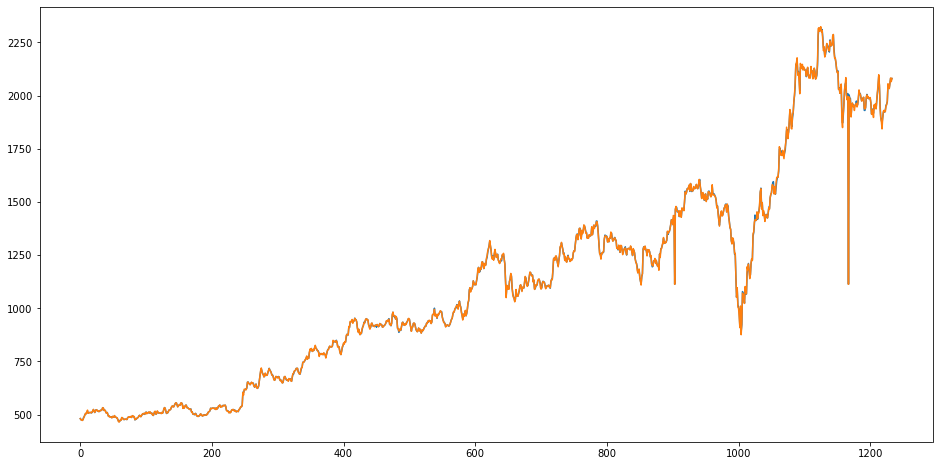

In [17]:
plt.figure(figsize=(16,8))
plt.plot(y_pred)
plt.plot(y)

In [18]:
print(y_pred)

[ 480.9075042  476.0575042  476.349994  ... 2080.1849853 2072.5100098
 2080.3800294]


## Testing on Untrained Dataset

In [19]:
test = pd.read_csv("data_test.csv")
test.drop(['Date','Adj Close'],axis=1,inplace=True)
X1=test.drop(['Close'],axis=1)
y1=test['Close']

In [20]:
y_pred2 = regressor.predict(X1)

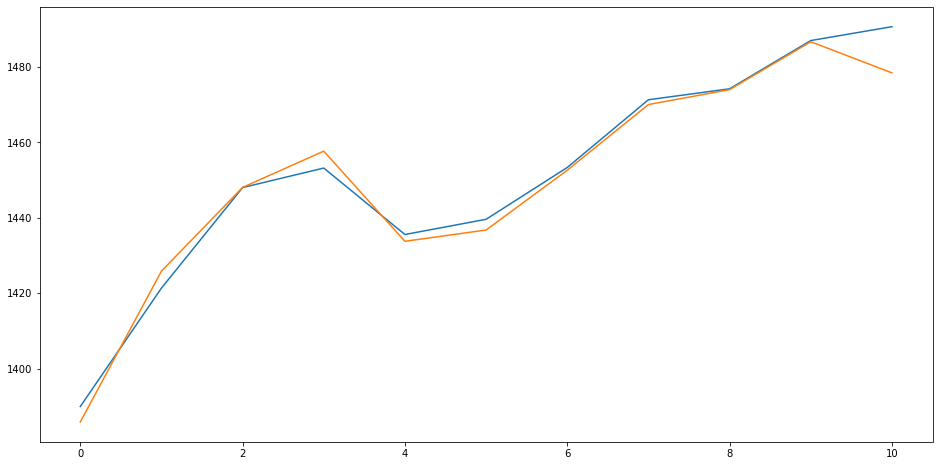

In [21]:
plt.figure(figsize=(16,8))
plt.plot(y_pred2)
plt.plot(y1)

## Testing on different dataset

In [22]:
test2 = pd.read_csv("data_test2.csv")

In [23]:
data3 = pd.read_csv("final_test.csv")
data3.drop(['Date','Adj Close'],axis=1,inplace=True)
data3.High.fillna(data3.High.mean(),inplace=True)
data3.Open.fillna(data3.Open.mean(),inplace=True)
data3.Low.fillna(data3.Low.mean(),inplace=True)
data3.Close.fillna(data3.Close.mean(),inplace=True)
#data.Adj Close.fillna(data.Adj Close.mean(),inplace=True)
data3.Volume.fillna(data3.Volume.mean(),inplace=True)
X3=data3.drop(['Close'],axis=1)
y3=data3['Close']

In [24]:
y_pred4 = regressor.predict(X3)

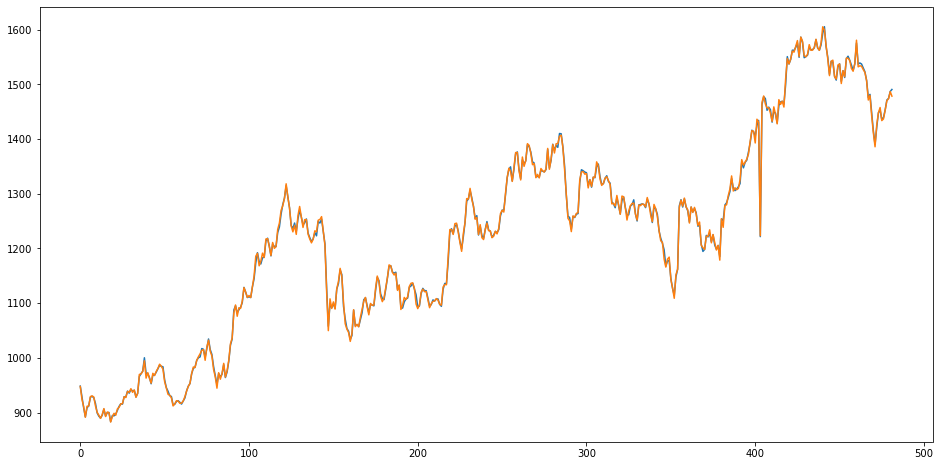

In [25]:
plt.figure(figsize=(16,8))
plt.plot(y_pred4)
plt.plot(y3)

In [26]:
data3.loc[:, data3.isnull().any()].columns

Index([], dtype='object')

In [27]:
regressor.predict([[498.50, 498.80,494,535322]])

array([496.2])

In [28]:
regressor.predict([[412.67, 416.08,402.50,1308298]])

array([467.3774964])